# 1 第一章：数据加载
## 1.1 载入数据
数据集下载 https://www.kaggle.com/c/titanic/overview
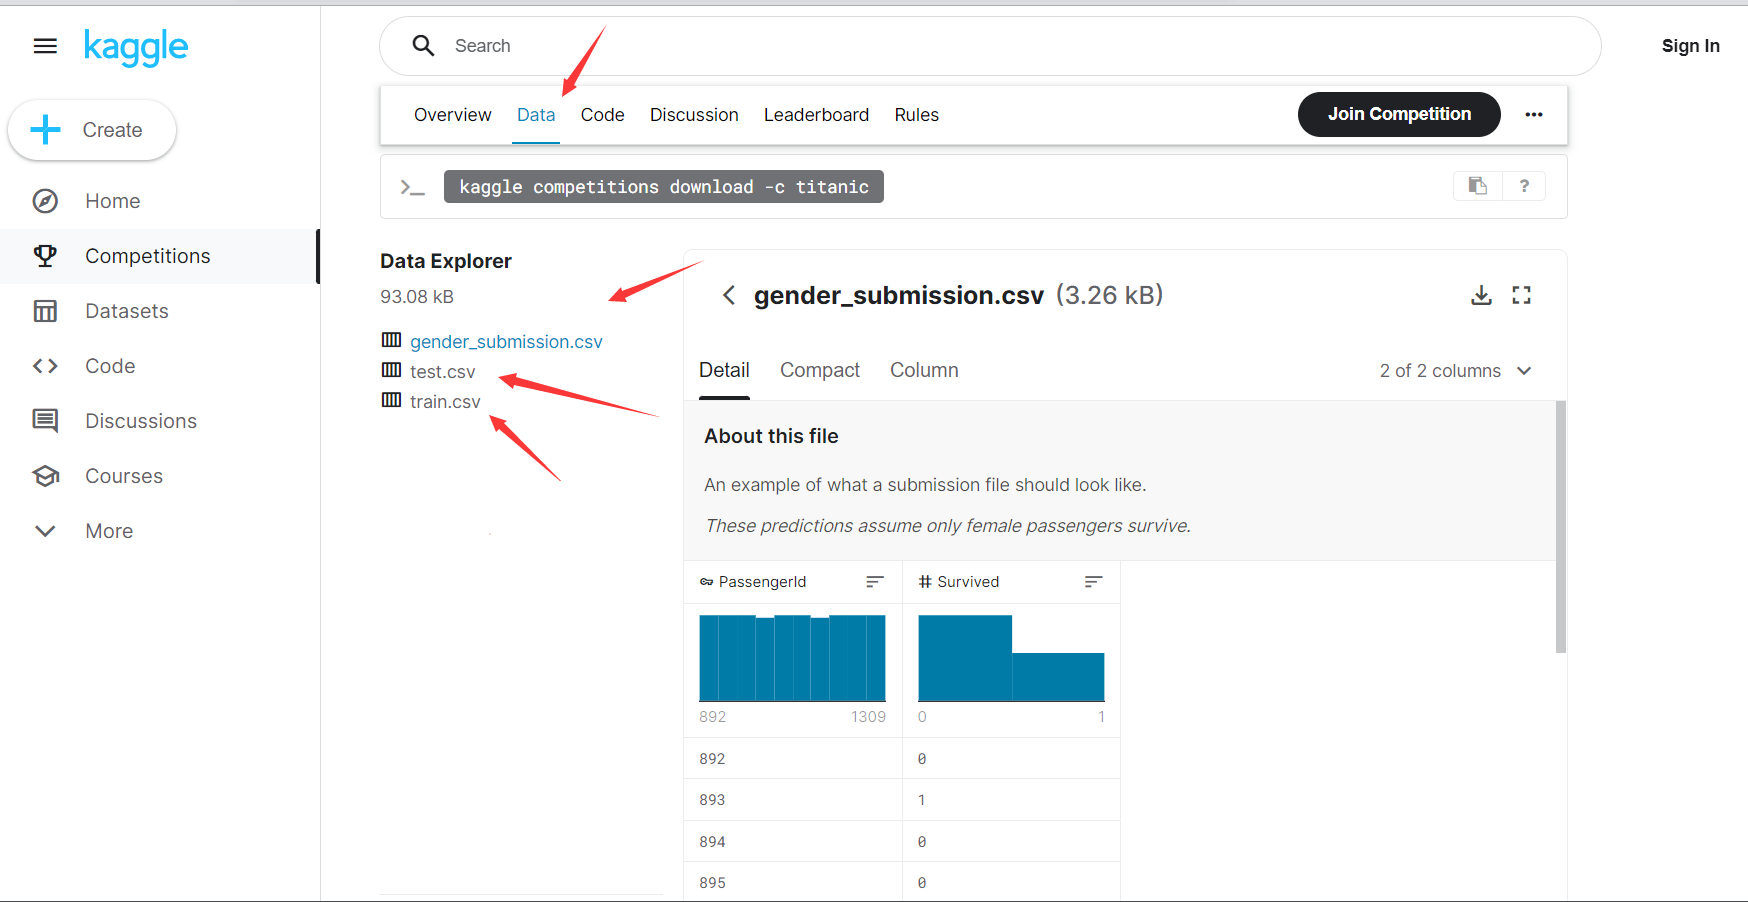
下载这三个即可
pandas 文档地址 ： https://pandas.pydata.org/docs/

### 1.1.1 任务一：导入numpy和pandas

In [1]:
import numpy as np
import pandas as pd

如果失败，说明你的python环境下面还没安装numpy和pandas这两个库

### 1.1.2 任务二：载入数据
#### (1) 使用相对路径载入数据

In [2]:
df = pd.read_csv('train.csv') #df 为dataFrame
df.head(3) #显示三行数据即可，若不填则默认5行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### (2) 使用绝对路径载入数据

导入： import os
然后使用 os.path.abspath('train.csv') 获取到我们的测试集绝对路径

In [3]:
    import os
    path = os.path.abspath('train.csv')

In [4]:
df = pd.read_csv(path)

In [5]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


【思考】知道数据加载的方法后，试试pd.read_csv()和pd.read_table()的不同，如果想让他们效果一样，需要怎么做？了解一下'.tsv'和'.csv'的不同，如何加载这两个数据集？

In [6]:
df = pd.read_table(path)

In [7]:
df.head(5)

,"PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked"
0,"1,0,3,""Braund, Mr. Owen Harris"",male,22,1,0,A/..."
1,"2,1,1,""Cumings, Mrs. John Bradley (Florence Br..."
2,"3,1,3,""Heikkinen, Miss. Laina"",female,26,0,0,S..."
3,"4,1,1,""Futrelle, Mrs. Jacques Heath (Lily May ..."
4,"5,0,3,""Allen, Mr. William Henry"",male,35,0,0,3..."


可以看到这里并没有像上面那样打开文件，通过查阅官方文档：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html
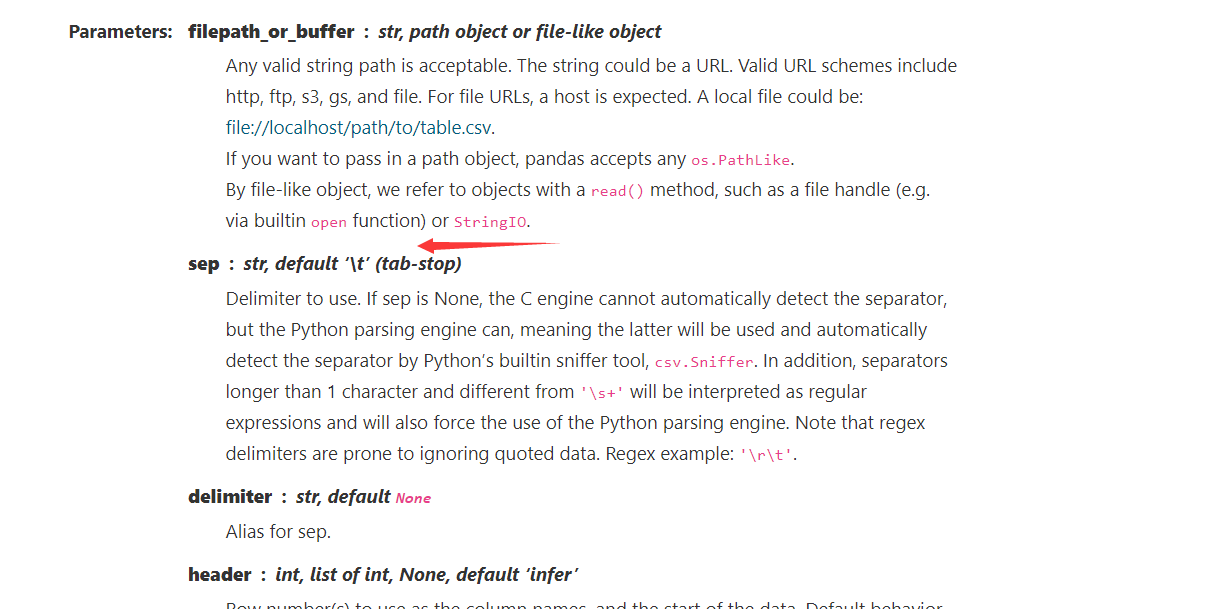
可以看到，pd.read_table默认的分隔符是'\t'，所以我们需要设置sep=','


In [8]:
df = pd.read_table('train.csv',sep=',')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.1.3 任务三：每1000行为一个数据模块，逐块读取

In [9]:
chunker = pd.read_csv('train.csv', chunksize=1000) # chunk 即块的意思

In [10]:
chunker.get_chunk()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
chunker = pd.read_csv('train.csv', chunksize=100)
for ck in chunker:
    print(ck)

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
2

【思考】什么是逐块读取？为什么要逐块读取呢？

In [12]:
type(chunker)

pandas.io.parsers.TextFileReader

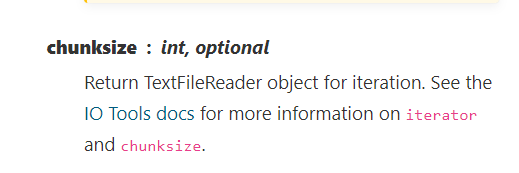
pandas.read_csv 参数 chunksize 通过指定一个分块大小（每次读取多少行）来读取大数据文件，可避免一次性读取内存不足，返回的是一个可迭代对象 TextFileReader 。


### 1.1.4 任务四：将表头改成中文，索引改为乘客ID [对于某些英文资料，我们可以通过翻译来更直观的熟悉我们的数据]

PassengerId => 乘客ID  
Survived => 是否幸存  
Pclass => 乘客等级(1/2/3等舱位)  
Name => 乘客姓名  
Sex => 性别  
Age => 年龄  
SibSp => 堂兄弟/妹个数  
Parch => 父母与小孩个数  
Ticket => 船票信息  
Fare => 票价  
Cabin => 客舱  
Embarked => 登船港口  

一共有几种方法：  
tips:假如我们将小子字母的列名改为大写  
第一：按列表修改  
```python
df.columns = ['A','B', ...]  
```
第二种：只修改一列  
```python
df.rename(columns={'a':'A'})  
```
第三种：创建dataframe对象时(或者说是读取文件时)修改  
tips:这个方法其实是增加了一个表头，所以会看到我们的行数会增加了1行
```python
df = pd.read_csv('train.csv', names=['A','B', ...] 
```
那么我们下面使用第一种演示  

In [13]:
df = pd.read_csv('train.csv')
df.columns = ['乘客ID','是否幸存','乘客等级(1/2/3等舱位)','乘客姓名',
              '性别','年龄','堂兄弟/妹个数','父母与小孩个数',
              '船票信息','票价','客舱','登船港口']
df.head(10)

,乘客ID,是否幸存,乘客等级(1/2/3等舱位),乘客姓名,性别,年龄,堂兄弟/妹个数,父母与小孩个数,船票信息,票价,客舱,登船港口
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


看一看第三种演示的效果

In [14]:
df = pd.read_csv('train.csv', names=['乘客ID','是否幸存','乘客等级(1/2/3等舱位)','乘客姓名',
              '性别','年龄','堂兄弟/妹个数','父母与小孩个数',
              '船票信息','票价','客舱','登船港口'])
df.head(10)

,乘客ID,是否幸存,乘客等级(1/2/3等舱位),乘客姓名,性别,年龄,堂兄弟/妹个数,父母与小孩个数,船票信息,票价,客舱,登船港口
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


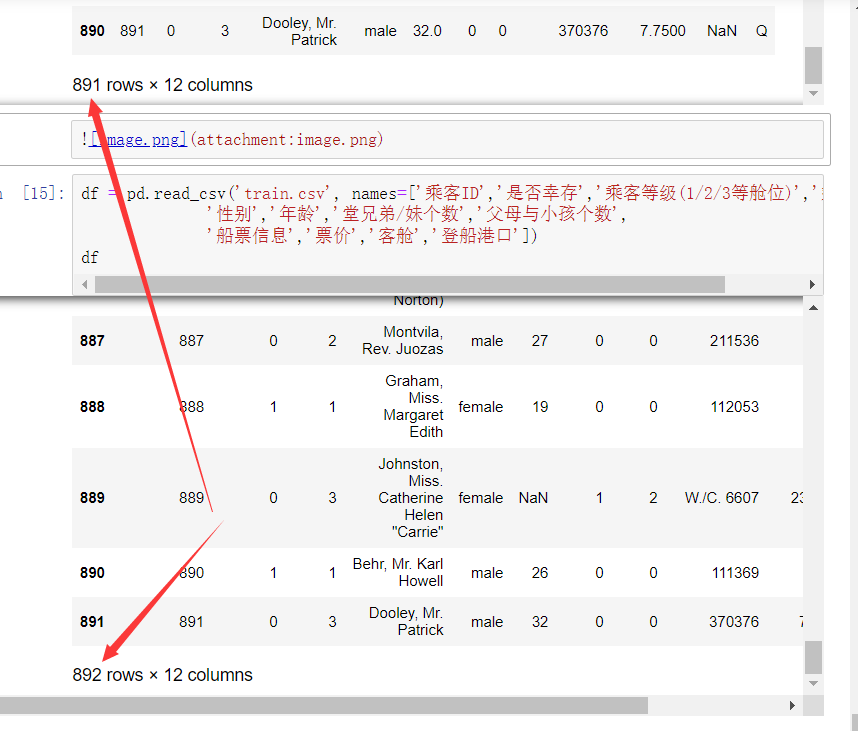
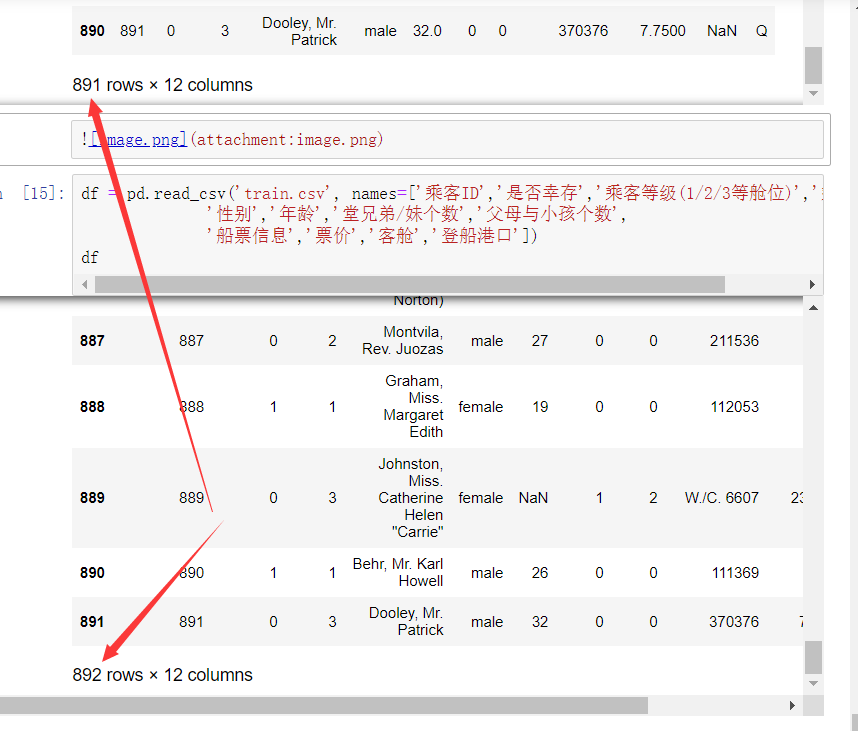

## 1.2 初步观察
导入数据后，你可能要对数据的整体结构和样例进行概览，比如说，数据大小、有多少列，各列都是什么格式的，是否包含null等

### 1.2.1 任务一：查看数据的基本信息

In [ ]:
如果出现这个bug：
> TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
大概率是你的pandas版本不对
更新到最新的pandas即可
    

In [27]:
df.info() # 该bug待解决 

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

### 1.2.2 任务二：观察表格前10行的数据和后15行的数据

In [31]:
df.head(10)

,乘客ID,是否幸存,乘客等级(1/2/3等舱位),乘客姓名,性别,年龄,堂兄弟/妹个数,父母与小孩个数,船票信息,票价,客舱,登船港口
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [32]:
df.tail(15)

,乘客ID,是否幸存,乘客等级(1/2/3等舱位),乘客姓名,性别,年龄,堂兄弟/妹个数,父母与小孩个数,船票信息,票价,客舱,登船港口
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### 1.2.4 任务三：判断数据是否为空，为空的地方返回True，其余地方返回False

In [29]:
df.isnull().head() # isnull 返回一个df对象

,乘客ID,是否幸存,乘客等级(1/2/3等舱位),乘客姓名,性别,年龄,堂兄弟/妹个数,父母与小孩个数,船票信息,票价,客舱,登船港口
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


## 1.3 保存数据
### 1.3.1 任务一：将你加载并做出改变的数据，在工作目录下保存为一个新文件train_chinese.csv

In [30]:
df.to_csv('train_chinese.csv') #to_csv 默认以逗号为分隔符将此对象转为csv文件